In this notebook we'll do exploratory data analysis of a global per-capita Gross Domestic Product (GDP) dataset from 1970-2022, measured in US Dollars (USD).

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#You can find this data at (https://www.kaggle.com/datasets/dataanalyst001/per-capita-gdp-of-all-countries-1970-to-2022)
file_path = r'C:\Users\chlaw\OneDrive\Documents\GitHub\project1\gdp_data.csv'

#Load our CSV file into Pandas
data = pd.read_csv(file_path)

Inspect the elements of the dataset...

In [3]:
data.head()

,Sr.No,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afghanistan,162.642176,166.224832,141.365323,149.744069,181.598776,194.669036,205.674097,232.778698,...,631.060444,596.048898,554.004007,526.164709,534.020133,513.981256,512.910125,512.749930,378.082892,344.649112
1,2,Albania,974.554499,975.216820,976.521166,978.617771,981.265874,984.901966,989.749878,994.937066,...,4425.430822,4586.606188,3950.390255,4117.006970,4521.752217,5268.116608,5359.239078,5288.989573,6281.046775,6655.258391
2,3,Algeria,373.670080,380.125666,496.991248,624.193795,875.023948,989.243356,1075.725904,1225.090692,...,5519.777576,5516.229431,4197.417286,3967.200546,4134.936055,4171.795392,4021.983602,3354.157303,3700.320562,4273.922183
3,4,Andorra,5008.901637,5305.716707,6285.301526,7824.531307,9078.009005,10076.494834,9817.312977,10384.507961,...,44735.004774,45619.782548,38869.870777,39904.138181,40632.206416,42904.822583,41328.634079,37207.175636,42065.970756,42293.297081
4,5,Angola,631.514939,648.910896,644.659613,762.730111,827.378464,589.868220,547.946934,578.443953,...,5228.511165,5371.216648,4130.930080,3468.520268,4042.681382,3240.862207,2569.629757,1639.951023,2026.030952,3183.699796


Overall this looks like what we wanted, but it has an extra column "Sr.No" that we can discard.

In [4]:
#Remove the unnecessary column "Sr.No"
data.drop(columns=['Sr.No'], inplace=True)

Next we'll check the size of the dataset.

In [5]:
row_count = data.shape[0]
column_count = data.shape[1]
print(f'There are {row_count} rows and {column_count} columns in our dataset.')

There are 187 rows and 54 columns in our dataset.


We can proceed to inspect the data type of each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  187 non-null    object 
 1   1970     187 non-null    float64
 2   1971     187 non-null    float64
 3   1972     187 non-null    float64
 4   1973     187 non-null    float64
 5   1974     187 non-null    float64
 6   1975     187 non-null    float64
 7   1976     187 non-null    float64
 8   1977     187 non-null    float64
 9   1978     187 non-null    float64
 10  1979     187 non-null    float64
 11  1980     187 non-null    float64
 12  1981     187 non-null    float64
 13  1982     187 non-null    float64
 14  1983     187 non-null    float64
 15  1984     187 non-null    float64
 16  1985     187 non-null    float64
 17  1986     187 non-null    float64
 18  1987     187 non-null    float64
 19  1988     187 non-null    float64
 20  1989     187 non-null    float64
 21  1990     187 non

Each of the columns appears to have the correct data type assigned.

How many countries have null/empty values anywhere in the data?

In [7]:
#create a new dataframe of countries with null data, and reference its size
countries_with_missing_data = data[data.isnull().any(axis=1)]
print(f'There are {countries_with_missing_data.shape[0]} countries with missing data in this dataset.')

There are 8 countries with missing data in this dataset.


Since we'll omit these countries from the analysis, let's record them in a list, for posterity.

In [8]:
omitted_countries = np.array(countries_with_missing_data['Country'])
print(omitted_countries)

['Czechoslovakia (Former)' 'Ethiopia (Former)'
 'Former Netherlands Antilles' 'Sudan (Former)' 'USSR (Former)'
 'Yemen Arab Republic (Former)' 'Yemen Democratic (Former)'
 'Yugoslavia (Former)']


Proceed to remove the countries with missing data from the dataset.

In [9]:
data.dropna(inplace=True, ignore_index=True)

Which countries have the highest and lowest per capita GDP in 2022?

In [10]:
#First we'll look at the highest
max_2022 = data[data['2022'] == data['2022'].max()]
max_2022

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
108,Monaco,11706.408105,12907.451868,15647.128859,20160.375873,21632.94633,27057.417844,27514.584293,29922.630934,36521.05534,...,185001.79624,195511.394093,170270.150743,174294.01287,173611.784301,193968.166388,199382.781207,182537.304601,235132.745557,240535.043309


Monaco has a per capita GDP of $250,535 as of 2022. Incredible!

In [11]:
#Next we'll find the lowest
min_2022 = data[data['2022'] == data['2022'].min()]
min_2022

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
27,Burundi,70.168159,70.494594,68.829523,85.537148,94.637389,110.655636,119.380471,138.319814,151.908048,...,241.549503,257.822931,262.001758,268.733291,295.620936,288.626394,283.66987,282.431058,298.170349,312.874378


Burundi has a per capita GDP of just $312 as of 2022.

Let's make a plot of 2022 GDP data by country, in order to better understand the distribution.

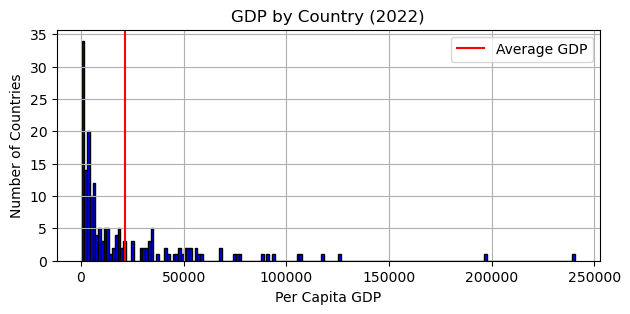

In [12]:
plt.figure(figsize=(7,3))
plt.hist(data['2022'], bins=179, color='blue', edgecolor='black')
plt.axvline(data['2022'].mean(), color='red', label='Average GDP')
plt.title('GDP by Country (2022)')
plt.xlabel('Per Capita GDP')
plt.ylabel('Number of Countries')
plt.legend()
plt.grid(True)
plt.show()

It appears there are lots of countries at the low end of the distribution, and a few outliers with much higher economic output.

Let's add a column to the dataset to calculate the total growth percentage each country experienced from 1970-2022.

In [13]:
data['Total_Growth_Percent'] = (((data['2022'] - data['1970']) / data['1970']) *100).round(2)
data[['Country','Total_Growth_Percent']]

,Country,Total_Growth_Percent
0,Afghanistan,111.91
1,Albania,582.90
2,Algeria,1043.77
3,Andorra,744.36
4,Angola,404.14
...,...,...
174,Vanuatu,590.34
175,Venezuela (Bolivarian Republic of),274.25
176,Viet Nam,6190.63
177,Zambia,303.59


Next we can view a summary of descriptive statistics for the dataset.

In [14]:
data.describe(include='all')

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total_Growth_Percent
count,179,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
unique,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1095.867682,1215.069790,1413.657838,1773.882849,2243.912588,2464.297019,2659.810014,2930.199689,3304.730135,...,19389.855328,17510.426356,17654.065018,18470.677082,19556.597351,19378.379540,17893.779980,20454.420382,21213.009641,1925.650670
std,NaN,1500.424503,1672.183290,1988.410351,2556.275825,3383.944855,3850.175980,4225.936009,4657.322494,5095.497252,...,29297.366217,26149.778473,26398.826760,27265.450226,29029.398865,28746.558990,27266.242929,32313.750589,32925.369671,1868.082569
min,NaN,44.521365,47.939054,50.492965,56.515341,62.343096,71.074239,75.712074,77.457973,82.355693,...,257.822931,262.001758,268.733291,295.620936,288.626394,283.669870,282.431058,298.170349,312.874378,16.620000
25%,NaN,224.419626,238.050884,275.569911,339.492119,388.608500,419.166600,434.316151,483.263849,555.744376,...,2087.905584,2127.484188,2126.149482,2120.321972,2351.493347,2366.391819,2200.828660,2435.555445,2465.901217,754.340000
50%,NaN,456.141164,476.565736,560.263804,692.681596,869.604041,889.056832,900.504248,1033.105677,1173.577242,...,6959.839547,6228.426299,6163.861179,6705.339802,6947.818053,6955.881770,6327.598962,6635.463923,6984.216959,1449.520000
75%,NaN,1212.608199,1230.716925,1412.715352,1923.599204,2455.041626,2769.106401,2972.507461,3294.532143,3598.896781,...,24752.837664,23136.104683,23782.244659,25004.516355,26123.860763,26832.177371,22836.749167,25846.571854,29958.822758,2331.680000


In [15]:
#calculate mean total growth
mean_growth = data.Total_Growth_Percent.sum()/len(data.Total_Growth_Percent)

The average (mean) growth experienced by countries in our dataset from 1970-2022 is 1,925.65%
The median growth amount is 1,449.52%.

In [16]:
#calculate standard deviation of total growth
standard_deviation_growth = data.Total_Growth_Percent.std()

The standard deviation of total growth percent is 1868.08. This is a large value relative to our mean of 1,925.65%, indicating a wide distribution of growth rates.

Let's plot the distribution of total growth percentage.

In [ ]:
#First we'll make a histogram
plt.figure(figsize=(7, 3))
plt.hist(data['Total_Growth_Percent'], bins=179, color='blue', edgecolor='black')
plt.axvline(mean_growth, color='red', label='Average Growth')
plt.axvline(mean_growth + standard_deviation_growth, color='green', label='One Standard Deviation from the Average')
plt.axvline(mean_growth - standard_deviation_growth, color='green')
plt.title('Distribution of Total GDP Growth by Country')
plt.xlabel('Total Growth Percent')
plt.ylabel('Number of Countries')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#We'll also make a box plot of the same data
sns.boxplot(data=data, x = 'Total_Growth_Percent')
plt.title('Distribution of Total GDP Growth by Country')
plt.axvline(mean_growth, color='red', label='Average Growth')
plt.axvline(mean_growth + standard_deviation_growth, color='green', label='One Standard Deviation from the Average')
plt.axvline(mean_growth - standard_deviation_growth, color='green')
plt.xlabel('Total Growth Percent')
plt.legend()
plt.show()

Upon closer inspection, we see that the distribution is skewed right, due to the contributions of a handful of countries with dramatic growth rates.

Which country experienced the highest total growth during the period of 1970-2022?

In [ ]:
sorted_by_growth = data.sort_values(by='Total_Growth_Percent', ignore_index=True, ascending=False)

In [ ]:
sorted_by_growth[sorted_by_growth['Total_Growth_Percent'] == sorted_by_growth['Total_Growth_Percent'].max()][['Country', 'Total_Growth_Percent']]

South Korea's GDP increased by more than a hundred-fold during this time period, with a staggering total growth of 11,595.36%.

Which country experienced the lowest total growth during this period?

In [ ]:
sorted_by_growth[sorted_by_growth['Total_Growth_Percent'] == sorted_by_growth['Total_Growth_Percent'].min()][['Country', 'Total_Growth_Percent']]

Mozambique's GDP increased by only 16.62% over a period of more than 50 years.

Where does the US fall in this ranking?

In [ ]:
sorted_by_growth[sorted_by_growth.Country == 'United States'][['Country', 'Total_Growth_Percent']]

Since the dataframe is zero-indexed, we see that the US ranked 99th in total growth percentage during this period.

Next let's find the which country had the biggest year of growth anywhere in the dataset.

In [ ]:
#adjust columm names to be integer rather than string values
sorted_by_growth.columns = [int(col) if col.isdigit() else col for col in sorted_by_growth.columns]

years = list(range(1970, 2023))

#create new dataframe containing year over year growth percentage data
yoy_growth = sorted_by_growth[years].pct_change(axis=1) * 100

#identify the largest growth value
max_yoy = yoy_growth.max().max()

In [ ]:
#merge country names into our YoY dataframe for readability
yoy_growth = pd.concat([sorted_by_growth['Country'], yoy_growth], axis=1)

Here we can see that Oman experienced the largest single-year growth.

In [ ]:
yoy_growth[yoy_growth.isin([max_yoy]).any(axis=1)]

And below we can pinpoint that this occurred in 1974.

In [ ]:
yoy_growth[yoy_growth.isin([max_yoy]).any(axis=1)][yoy_growth.isin([max_yoy])]

228.94% growth in one year is pretty great!

We can also analyze the average year-over-year growth of countries in our dataset.

In [ ]:
average_data_yoy = yoy_growth.iloc[:, 1:].mean()
average_growth_yoy = average_data_yoy.mean()
average_growth_yoy

Countries in our dataset grew 6.14% on average each year between 1970-2022.

Finally let's visualize the economic growth of the countries in our dataset over time.

What does it look like if we graph all of the countries at once?

In [ ]:
plt.figure(figsize=(7,3))
for index, row in data.iterrows():
    country_data = row.iloc[1:-1]
    plt.plot(years, country_data, linestyle = '-', label = f'{row.Country}')

plt.xlabel('Year')
plt.ylabel('Per Capita GDP (USD)')
plt.title("Global Overview of GDP")
plt.show()

That's a bit too messy. Let's just look at one country at a time for now, and compare it to the average of the dataset.

In [ ]:
#Calculate average GDP values per year
average_data = data.iloc[:, 1:-1].mean()

Choose which country to examine below:

In [ ]:
country_name = "Oman"

First we'll plot the raw GDP values, and then follow up with year over year growth.

In [ ]:
#Select the data for our chosen country
country_data_raw = data[data.Country == country_name].iloc[0, 1:-1]

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(years, country_data_raw, linestyle = '-', color = 'red', label = f'{country_name}')
plt.plot(years, average_data, linestyle = '--', color = 'blue', label = 'Average')
plt.title(f'{country_name} GDP')
plt.xlabel('Year')
plt.ylabel('Per Capita GDP (USD)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
country_data_yoy = yoy_growth[yoy_growth.Country == country_name].iloc[0, 1:]

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(years, country_data_yoy, linestyle = '-', color = 'red', label = f'{country_name}')
plt.plot(years, average_data_yoy, linestyle = '--', color = 'blue', label = 'Average')
plt.title(f'{country_name} GDP Growth Year Over Year')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend(loc='best')
plt.grid()
plt.show()

Conclusion

In this project we demonstrated application of many skills introduced in the Codecademy ML/AI Foundations Skill Path, including data preparation, modification, statistical analysis, and several kinds of data visualization.

We analyzed the per-capita Gross Domestic Product of 179 nations over the time period of 1970-2022, including year-over-year growth analysis.

We found that the average total growth of a nation in our dataset during this time period was just shy of 2,000%, or almost 20x growth. The average yearly growth rate was 6.14%

A handful of extremely successful countries demonstrated much higher growth, most notably the Republic of Korea, which reported an impressive total growth of 11,595%.

Future improvements to this analysis could include adjustment for inflation, addition of region tags for geographic analysis, and incorporation of the countries we removed due to missing data.